In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics 
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

In [128]:
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import warnings
warnings.filterwarnings("ignore") 

# <font color = 'red'> ЛР 7. Метод главных компонент </font>

Сложность: <font color = 'green'> Легко  </font>.

Дата составления: 16.11.2023

Срок выполнения: 1 неделя (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Метод главных компонент.  </font>

Метод главных компонент (PCA) - классический метод понижения размерности данных. 

Пусть задана матрица информации, содержащая векторы с информацией о данных. $$X=\left(
\begin{array}{cccc}
 x_{1,1} & x_{1,2} & ... & x_{1,m} \\
 x_{2,1} & x_{2,2} & ... & x_{2,m} \\
 ... & ... & ... & ... \\
 x_{n,1} & x_{4,n} & ... & x_{n,m} \\
\end{array}
\right)$$

Как видим рассматриваем $n$ сэмплов и $m$ фич (признаков). Задача **понижения размерности** заключается в преобразовании исходных данных, таким образом, чтобы исходная информации хранилась с использованием меньшего числа фич $k<n$ с сохранением её ценности. Этот метот относится к классу методов **обучения без учителя**, поэтому в нём отсутсвуют целевые метки.

Для решения задачи введём некоторые обозначения. Пусть $Y = {y_{1},y_{2},...,y_{n}}$ выборка из генеральной совокупности. *Выборочное среднее* тогда записывается формулой $E(Y) = \frac{1}{n}  \sum\limits_{j=1}^n y_{i} $. Вторая характеристика выборки это *выборочная дисперсия*. Несмещённая оценка дисперции записывается в виде: $D(Y) = \frac{1}{n-1}  \sum\limits_{j=1}^n (y_{i} - E(y))^{2} $.

Заметим, что в случае, если $Y$ - несмещена, то есть $E(Y) = 0$, тогда $D(Y) = \frac{1}{n-1}  \sum\limits_{j=1}^n (y_{i})^{2}$. Если представить $Y$ в виде вектор столбца, то формулу дисперсии можно переписать в матричном виде: $D(\overline{Y}) = \frac{1}{n-1} \overline{Y}^{T}\overline{Y} $.

Вернёмся к нашей задаче. Найдем вектор $\overline{v}$, такой что при проекции данных на этот вектор, мы получим максимальную дисперсию. Этот вектор и будет первой новой компонентой, а полученные проекции сэмплов - координаты по новой компоненте.

Одномерный вектор проекции $X\overline{v}$ - тоже выборка, для которой мы можем посчитать дисперсию. Учитывая несмещённость данных получаем $D(X\overline{v}) = \frac{1}{n-1}(X\overline{v})^{T}X\overline{v} =  \overline{v}^{T} \frac{1}{n-1}X^{T}X\overline{v} = \overline{v}^{T} A \overline{v}$. Обозначим $A=\frac{1}{n-1}X^{T}X$. 

Далее получаем задачу оптимизации с условием. Для того, чтобы компонента была наиболее информативна, будем максимизировать дисперсию данных вдоль неё. Условием будет нормированность вектора $\overline{v}$.

$F(\overline{v}) = \overline{v}^{T} A \overline{v}  -> max$ 

$\overline{v}^{T}\overline{v} =  1$

Составим функцию Лагранжа $L(\overline{v}) = \overline{v}^{T} A \overline{v} - \lambda (\overline{v}^{T}\overline{v} - 1)$.

Проверяем необходимое условие условного экстремума, используя матричные производные:  $L(\overline{v})^{'} = ( A^{T}+A) \overline{v} - 2\lambda \overline{v} = 0$. Учитывая симметричность матрицы $A$ получим итоговое соотношение для компоненты $\overline{v} $. $$A\overline{v}=\lambda\overline{v}.$$

Полученное соотношение - это определение **собственного вектора** матрицы $A$. В качестве вектора главной компоненты возьмём один из них. А если учесть, что для полученного решения дисперсия $D(X\overline{v})= \overline{v}^{T} \lambda \overline{v} = \lambda$ (где $\lambda$ - собственное значение матрицы $A$), то максимальная дсиперсия будет достигаться вдоль собственного вектора, соответсвующего наибольшему собственному значению $A$.  Остальные компоненты также могут получены как собственные векторы, соответствующие собственным значениям в порядке убывания последних. 


Заметим, что полученная матрица $A$ - есть [матрица ковариации](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%B2%D0%B0%D1%80%D0%B8%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) для $X$.

Таким образом кратко алгоритм поиска новых компонент выглядит так:

1. Центрируем числовые данные.
2. Находим ковариационную матрицу.
3. Находим её собственные векторы и упорядочиваем их по убываению их собственных значений.
4. Выбираем нужное число компонент.
5. Проецируем на них данные.

<font color = 'red' size = 5>Задание 1 </font>

1. Реализуйте функцию для работы метода главных компонент методом собственных значений. 
2. Сравните результаты её работы со встроенной функцией на искусственных данных.

In [1]:
import numpy as np
from sklearn.decomposition import PCA

def my_pca(data, num_components):
    data_centered = data - np.mean(data, axis=0)
    data_centered = data_centered.transpose()
    
    cov_matrix = np.cov(data_centered)

    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[sorted_indices]
    eigen_vectors = eigen_vectors[:, sorted_indices]

    v = -eigen_vectors[:, :num_components]

    transformed_data = np.dot(data_centered.transpose(), v)

    prop = sum(eigen_values[:n_components]) / sum(eigen_values)

    return transformed_data, eigen_vectors, prop

In [84]:
X, y = datasets.make_blobs(n_samples=100, centers=3,n_features=10, random_state=0)

In [85]:
for n_components in range(1, X.shape[1]+1):
    X_own, eigenvectors, var_own = my_pca(X, num_components=n_components)
    pca_sklearn = PCA(n_components=n_components, random_state=0)
    X_sklearn = pca_sklearn.fit_transform(X)
    var_sklearn = sum(pca_sklearn.explained_variance_ratio_)
    print(f"k={n_components}, Моя дисперсия: {var_own},   Дисперсия sklearn: {var_sklearn}")

k=1, Моя дисперсия: 0.6335460614557494,   Дисперсия sklearn: 0.6335460614557498
k=2, Моя дисперсия: 0.9383160467479389,   Дисперсия sklearn: 0.9383160467479388
k=3, Моя дисперсия: 0.9494577454777964,   Дисперсия sklearn: 0.9494577454777963
k=4, Моя дисперсия: 0.9593699904522947,   Дисперсия sklearn: 0.9593699904522945
k=5, Моя дисперсия: 0.9683564117740875,   Дисперсия sklearn: 0.9683564117740874
k=6, Моя дисперсия: 0.9767577089914724,   Дисперсия sklearn: 0.9767577089914723
k=7, Моя дисперсия: 0.9815303551001578,   Дисперсия sklearn: 0.9835943431931613
k=8, Моя дисперсия: 0.9883669893018469,   Дисперсия sklearn: 0.9896905984616007
k=9, Моя дисперсия: 0.9939037447315607,   Дисперсия sklearn: 0.9952273538913146
k=10, Моя дисперсия: 1.0,   Дисперсия sklearn: 1.0


In [86]:
print("Собственные векторы (моя реализация):")
print(eigenvectors)

print("\nСобственные векторы (scikit-learn):")
print(pca_sklearn.components_.T)

Собственные векторы (моя реализация):
[[ 0.19263976  0.52284457  0.09831451  0.0550098  -0.28186768 -0.18271787
   0.47438217  0.55605245  0.16419439  0.05295156]
 [-0.18445329  0.27095715  0.47268023 -0.4645426  -0.53296414  0.16599715
  -0.23747483 -0.16720314 -0.22680713 -0.07703434]
 [-0.01360756 -0.19151264 -0.1640273  -0.43238305 -0.09358263 -0.44816512
  -0.09285965  0.05775819  0.46276697 -0.55996055]
 [ 0.34503968  0.13545714  0.41812155  0.37142227  0.08405724 -0.15592673
   0.22254627 -0.5051313  -0.02357638 -0.46173561]
 [-0.30482144 -0.24637282  0.06426263 -0.33222769  0.22923222  0.01524618
   0.66979378  0.05584045 -0.43800947 -0.18842874]
 [-0.57132625  0.35323391 -0.39110222  0.22754555 -0.18920515 -0.38934628
   0.09180548 -0.37287666 -0.07601883  0.05865989]
 [-0.38440387 -0.17602749  0.63378253  0.11227656  0.231065   -0.42175004
  -0.08668022  0.13031302  0.2296856   0.31376283]
 [-0.0687461   0.08873303 -0.00103089  0.25418643  0.11441302 -0.21985034
  -0.42086024

<font color = 'red' size = 5>Задание 2 </font>

In [104]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

1. Используя данные для цветков ириса произвести уменьшение размерности данных с помощью метода главных компонет. Реализовать собственный алгоритм, а также использовать встроенный.
2. Оценить степень потери данных. 
3. Выберите оптимальное количество компонент в новых данных. 
4. Протестируйте точность различных алгоритмов классификации на исходном датасете и на преобразованном с помощью метода главных компонент. Дайте подробные выводы о различных комбинациях числа компонет и алгоритмах. 

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
for n_components in range(1, X.shape[1]+1):
    X_own, eigenvectors, var_own = my_pca(X_train, num_components=n_components)
    pca_sklearn = PCA(n_components=n_components, random_state=0)
    X_sklearn = pca_sklearn.fit_transform(X_train)
    var_sklearn = sum(pca_sklearn.explained_variance_ratio_)
    print(f"k={n_components}, Моя реализация: {var_own:.4f}% данных сохранено,   sklearn: {var_sklearn:.4f}% данных сохранено")

k=1, Моя реализация: 0.9257% данных сохранено,   sklearn: 0.9257% данных сохранено
k=2, Моя реализация: 0.9796% данных сохранено,   sklearn: 0.9796% данных сохранено
k=3, Моя реализация: 0.9958% данных сохранено,   sklearn: 0.9958% данных сохранено
k=4, Моя реализация: 1.0000% данных сохранено,   sklearn: 1.0000% данных сохранено


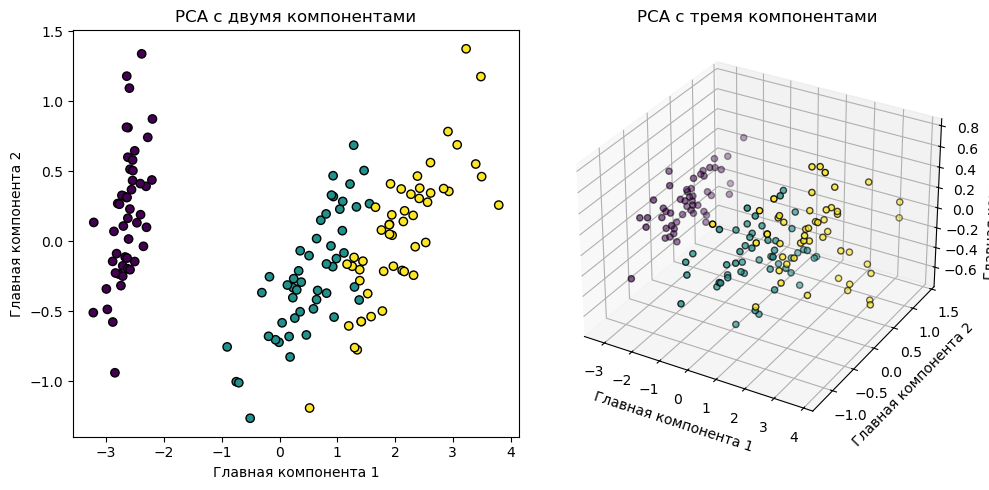

In [119]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)

pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(X)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('PCA с двумя компонентами')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')

ax = plt.subplot(1, 2, 2, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y, cmap='viridis', edgecolors='k')
ax.set_title('PCA с тремя компонентами')
ax.set_xlabel('Главная компонента 1')
ax.set_ylabel('Главная компонента 2')
ax.set_zlabel('Главная компонента 3')

plt.tight_layout()
plt.show()


In [125]:
model1_original = LogisticRegression()
model1_original.fit(X_train, y_train)
y_pred_original = model1_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print('Логистическая Регрессия')
print(f"Точность на исходных данных: {accuracy_original * 100:.4f}%")

for n_components in range(1, X_test.shape[1]+1):
    pca = PCA(n_components=n_components)
    transformed_data_sklearn = pca.fit_transform(X_train)

    model_pca_sklearn = LogisticRegression()
    model_pca_sklearn.fit(transformed_data_sklearn, y_train)

    X_test_transformed_sklearn = pca.transform(X_test)

    y_pred_pca_sklearn = model_pca_sklearn.predict(X_test_transformed_sklearn)

    accuracy_pca_sklearn = accuracy_score(y_test, y_pred_pca_sklearn)
    
    print(f"Точность после PCA (k={n_components}): {accuracy_pca_sklearn * 100:.4f}%")

Логистическая Регрессия
Точность на исходных данных: 97.7778%
Точность после PCA (k=1): 91.1111%
Точность после PCA (k=2): 97.7778%
Точность после PCA (k=3): 97.7778%
Точность после PCA (k=4): 97.7778%


In [126]:
model2_original = DecisionTreeClassifier()
model2_original.fit(X_train, y_train)
y_pred_original = model2_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print('Дерево принятия решений')
print(f"Точность на исходных данных: {accuracy_original * 100:.4f}%")

for n_components in range(1, X_test.shape[1]+1):
    pca = PCA(n_components=n_components)
    transformed_data_sklearn = pca.fit_transform(X_train)

    model_pca_sklearn = DecisionTreeClassifier()
    model_pca_sklearn.fit(transformed_data_sklearn, y_train)

    X_test_transformed_sklearn = pca.transform(X_test)

    y_pred_pca_sklearn = model_pca_sklearn.predict(X_test_transformed_sklearn)

    accuracy_pca_sklearn = accuracy_score(y_test, y_pred_pca_sklearn)
    
    print(f"Точность после PCA (k={n_components}): {accuracy_pca_sklearn * 100:.4f}%")

Дерево принятия решений
Точность на исходных данных: 97.7778%
Точность после PCA (k=1): 84.4444%
Точность после PCA (k=2): 95.5556%
Точность после PCA (k=3): 97.7778%
Точность после PCA (k=4): 95.5556%


In [129]:
model3_original = KNeighborsClassifier()
model3_original.fit(X_train, y_train)
y_pred_original = model3_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print('К ближайших соседей')
print(f"Точность на исходных данных: {accuracy_original * 100:.4f}%")

for n_components in range(1, X_test.shape[1]+1):
    pca = PCA(n_components=n_components)
    transformed_data_sklearn = pca.fit_transform(X_train)

    model_pca_sklearn = KNeighborsClassifier()
    model_pca_sklearn.fit(transformed_data_sklearn, y_train)

    X_test_transformed_sklearn = pca.transform(X_test)

    y_pred_pca_sklearn = model_pca_sklearn.predict(X_test_transformed_sklearn)

    accuracy_pca_sklearn = accuracy_score(y_test, y_pred_pca_sklearn)
    
    print(f"Точность после PCA (k={n_components}): {accuracy_pca_sklearn * 100:.4f}%")

К ближайших соседей
Точность на исходных данных: 97.7778%
Точность после PCA (k=1): 91.1111%
Точность после PCA (k=2): 97.7778%
Точность после PCA (k=3): 97.7778%
Точность после PCA (k=4): 97.7778%


<font color = 'red' size = 5>Задание 3 </font>

1. Используя данные о рукописных цифрах произвести уменьшение размерности данных с помощью метода главных компонет.Реализовать собственный алгоритм, а также использовать встроенный.
2. Оценить степень потери данных. 
3. Выберите оптимальное колиечество компонент в новых данных. 
4. Протестируйте точность различных алгоритмов классификации на исходном датасете и на преобразованном с помощью метода главных компонент. Дайте подробные выводы о различных комбинациях числа компонет и алгоритмах. 

In [130]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
for n_components in range(1, X.shape[1]+1):
    X_own, eigenvectors, var_own = my_pca(X_train, num_components=n_components)
    pca_sklearn = PCA(n_components=n_components, random_state=0)
    X_sklearn = pca_sklearn.fit_transform(X_train)
    var_sklearn = sum(pca_sklearn.explained_variance_ratio_)
    print(f"k={n_components}, Моя реализация: {var_own:.4f}% данных сохранено,   sklearn: {var_sklearn:.4f}% данных сохранено")

k=1, Моя реализация: 0.1525% данных сохранено,   sklearn: 0.1525% данных сохранено
k=2, Моя реализация: 0.2927% данных сохранено,   sklearn: 0.2927% данных сохранено
k=3, Моя реализация: 0.4111% данных сохранено,   sklearn: 0.4111% данных сохранено
k=4, Моя реализация: 0.4956% данных сохранено,   sklearn: 0.4956% данных сохранено
k=5, Моя реализация: 0.5531% данных сохранено,   sklearn: 0.5531% данных сохранено
k=6, Моя реализация: 0.6021% данных сохранено,   sklearn: 0.6021% данных сохранено
k=7, Моя реализация: 0.6429% данных сохранено,   sklearn: 0.6429% данных сохранено
k=8, Моя реализация: 0.6790% данных сохранено,   sklearn: 0.6790% данных сохранено
k=9, Моя реализация: 0.7125% данных сохранено,   sklearn: 0.7125% данных сохранено
k=10, Моя реализация: 0.7427% данных сохранено,   sklearn: 0.7427% данных сохранено
k=11, Моя реализация: 0.7659% данных сохранено,   sklearn: 0.7659% данных сохранено
k=12, Моя реализация: 0.7880% данных сохранено,   sklearn: 0.7880% данных сохранено
k

Логистическая регрессия
Точность на исходных данных: 95.3704%
Точность после PCA (k=1): 35.9259%
Точность после PCA (k=2): 57.9630%
Точность после PCA (k=3): 66.2963%
Точность после PCA (k=4): 77.2222%
Точность после PCA (k=5): 84.0741%
Точность после PCA (k=6): 85.9259%
Точность после PCA (k=7): 87.9630%
Точность после PCA (k=8): 90.0000%
Точность после PCA (k=9): 91.8519%
Точность после PCA (k=10): 91.8519%
Точность после PCA (k=11): 92.7778%
Точность после PCA (k=12): 92.2222%
Точность после PCA (k=13): 93.3333%
Точность после PCA (k=14): 92.7778%
Точность после PCA (k=15): 91.8519%
Точность после PCA (k=16): 91.8519%
Точность после PCA (k=17): 93.7037%
Точность после PCA (k=18): 94.8148%
Точность после PCA (k=19): 94.2593%
Точность после PCA (k=20): 93.7037%
Точность после PCA (k=21): 94.2593%
Точность после PCA (k=22): 94.8148%
Точность после PCA (k=23): 95.1852%
Точность после PCA (k=24): 95.1852%
Точность после PCA (k=25): 94.8148%
Точность после PCA (k=26): 95.1852%
Точность по

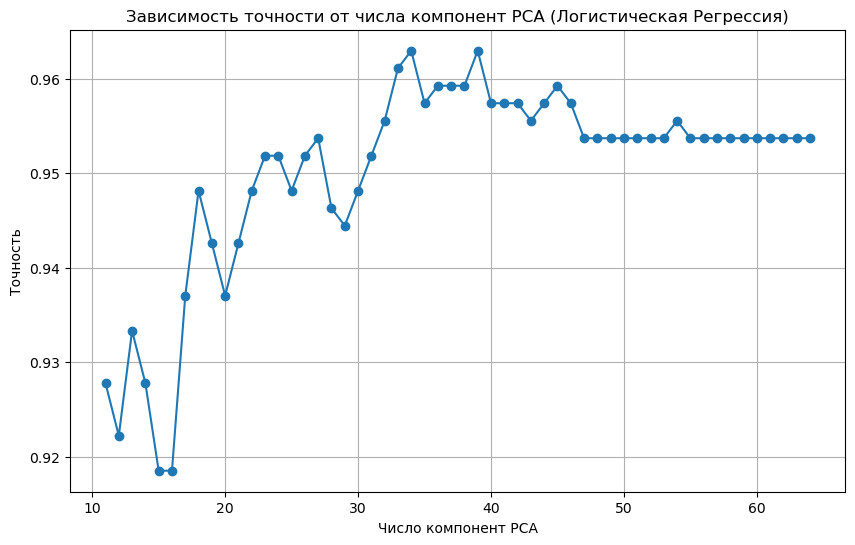

In [140]:
model1_original = LogisticRegression()
model1_original.fit(X_train, y_train)
y_pred_original = model1_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print('Логистическая регрессия')
print(f"Точность на исходных данных: {accuracy_original * 100:.4f}%")

components_list = []
accuracy_list = []

for n_components in range(1, X_test.shape[1] + 1):
    pca = PCA(n_components=n_components)
    transformed_data_sklearn = pca.fit_transform(X_train)

    model_pca_sklearn = LogisticRegression()
    model_pca_sklearn.fit(transformed_data_sklearn, y_train)

    X_test_transformed_sklearn = pca.transform(X_test)

    y_pred_pca_sklearn = model_pca_sklearn.predict(X_test_transformed_sklearn)

    accuracy_pca_sklearn = accuracy_score(y_test, y_pred_pca_sklearn)

    components_list.append(n_components)
    accuracy_list.append(accuracy_pca_sklearn)

    print(f"Точность после PCA (k={n_components}): {accuracy_pca_sklearn * 100:.4f}%")

plt.figure(figsize=(10, 6))
plt.plot(components_list[10:], accuracy_list[10:], marker='o')
plt.title('Зависимость точности от числа компонент PCA (Логистическая Регрессия)')
plt.xlabel('Число компонент PCA')
plt.ylabel('Точность')
plt.grid(True)
plt.show()

Дерево принятия решений
Точность на исходных данных: 85.0000%
Точность после PCA (k=1): 27.9630%
Точность после PCA (k=2): 55.5556%
Точность после PCA (k=3): 69.8148%
Точность после PCA (k=4): 74.0741%
Точность после PCA (k=5): 82.0370%
Точность после PCA (k=6): 82.2222%
Точность после PCA (k=7): 84.4444%
Точность после PCA (k=8): 84.0741%
Точность после PCA (k=9): 87.5926%
Точность после PCA (k=10): 87.0370%
Точность после PCA (k=11): 86.1111%
Точность после PCA (k=12): 86.1111%
Точность после PCA (k=13): 87.4074%
Точность после PCA (k=14): 87.2222%
Точность после PCA (k=15): 85.7407%
Точность после PCA (k=16): 85.9259%
Точность после PCA (k=17): 86.1111%
Точность после PCA (k=18): 85.7407%
Точность после PCA (k=19): 84.8148%
Точность после PCA (k=20): 86.4815%
Точность после PCA (k=21): 84.8148%
Точность после PCA (k=22): 84.4444%
Точность после PCA (k=23): 84.6296%
Точность после PCA (k=24): 86.1111%
Точность после PCA (k=25): 85.3704%
Точность после PCA (k=26): 85.1852%
Точность по

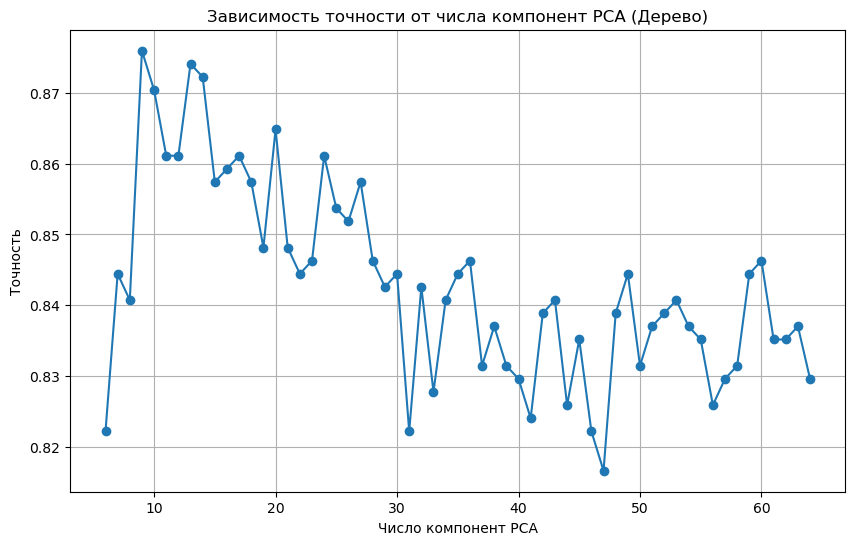

In [142]:
model2_original =  DecisionTreeClassifier()
model2_original.fit(X_train, y_train)
y_pred_original = model2_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print('Дерево принятия решений')
print(f"Точность на исходных данных: {accuracy_original * 100:.4f}%")

components_list = []
accuracy_list = []

for n_components in range(1, X_test.shape[1] + 1):
    pca = PCA(n_components=n_components)
    transformed_data_sklearn = pca.fit_transform(X_train)

    model_pca_sklearn =  DecisionTreeClassifier()
    model_pca_sklearn.fit(transformed_data_sklearn, y_train)

    X_test_transformed_sklearn = pca.transform(X_test)

    y_pred_pca_sklearn = model_pca_sklearn.predict(X_test_transformed_sklearn)

    accuracy_pca_sklearn = accuracy_score(y_test, y_pred_pca_sklearn)

    components_list.append(n_components)
    accuracy_list.append(accuracy_pca_sklearn)

    print(f"Точность после PCA (k={n_components}): {accuracy_pca_sklearn * 100:.4f}%")

plt.figure(figsize=(10, 6))
plt.plot(components_list[5:], accuracy_list[5:], marker='o')
plt.title('Зависимость точности от числа компонент PCA (Дерево)')
plt.xlabel('Число компонент PCA')
plt.ylabel('Точность')
plt.grid(True)
plt.show()

К ближайших соседей
Точность на исходных данных: 98.1481%
Точность после PCA (k=1): 30.3704%
Точность после PCA (k=2): 57.9630%
Точность после PCA (k=3): 72.2222%
Точность после PCA (k=4): 84.8148%
Точность после PCA (k=5): 90.9259%
Точность после PCA (k=6): 91.2963%
Точность после PCA (k=7): 95.1852%
Точность после PCA (k=8): 95.9259%
Точность после PCA (k=9): 97.4074%
Точность после PCA (k=10): 97.2222%
Точность после PCA (k=11): 97.5926%
Точность после PCA (k=12): 98.1481%
Точность после PCA (k=13): 97.7778%
Точность после PCA (k=14): 97.9630%
Точность после PCA (k=15): 98.3333%
Точность после PCA (k=16): 98.3333%
Точность после PCA (k=17): 98.1481%
Точность после PCA (k=18): 97.9630%
Точность после PCA (k=19): 97.9630%
Точность после PCA (k=20): 98.1481%
Точность после PCA (k=21): 97.9630%
Точность после PCA (k=22): 97.9630%
Точность после PCA (k=23): 98.1481%
Точность после PCA (k=24): 97.9630%
Точность после PCA (k=25): 98.1481%
Точность после PCA (k=26): 98.1481%
Точность после 

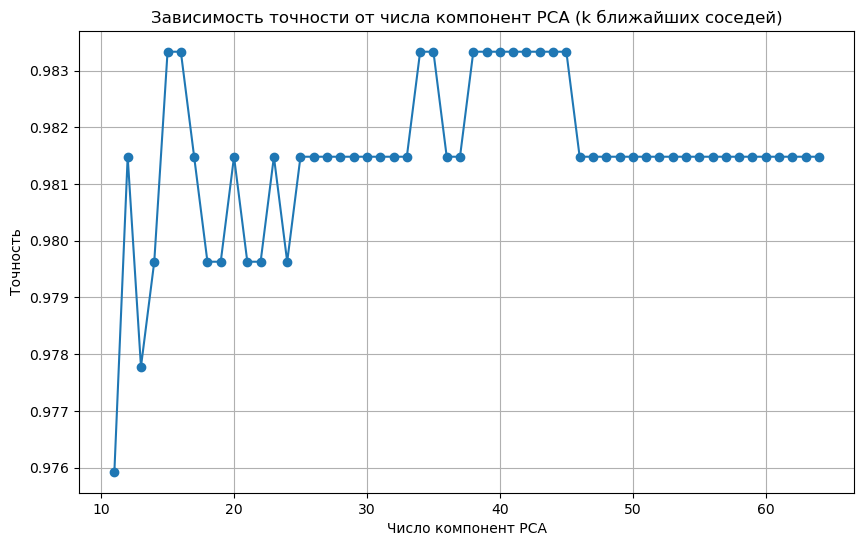

In [144]:
model3_original = KNeighborsClassifier()
model3_original.fit(X_train, y_train)
y_pred_original = model3_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print('К ближайших соседей')
print(f"Точность на исходных данных: {accuracy_original * 100:.4f}%")

components_list = []
accuracy_list = []

for n_components in range(1, X_test.shape[1] + 1):
    pca = PCA(n_components=n_components)
    transformed_data_sklearn = pca.fit_transform(X_train)

    model_pca_sklearn =  KNeighborsClassifier()
    model_pca_sklearn.fit(transformed_data_sklearn, y_train)

    X_test_transformed_sklearn = pca.transform(X_test)

    y_pred_pca_sklearn = model_pca_sklearn.predict(X_test_transformed_sklearn)

    accuracy_pca_sklearn = accuracy_score(y_test, y_pred_pca_sklearn)

    components_list.append(n_components)
    accuracy_list.append(accuracy_pca_sklearn)

    print(f"Точность после PCA (k={n_components}): {accuracy_pca_sklearn * 100:.4f}%")

plt.figure(figsize=(10, 6))
plt.plot(components_list[10:], accuracy_list[10:], marker='o')
plt.title('Зависимость точности от числа компонент PCA (k ближайших соседей)')
plt.xlabel('Число компонент PCA')
plt.ylabel('Точность')
plt.grid(True)
plt.show()

<font color = 'red' size = 5>Задание 4 </font>

Вычислениями подвердите связь [сингулярного разложения матрицы](https://neerc.ifmo.ru/wiki/index.php?title=%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5) с методом главных компонент. Приведите практический пример.

In [185]:
iris = datasets.load_iris()
X = iris.data

In [196]:
X_centered = X - np.mean(X, axis=0)
X_centered = X_centered.transpose()
cov_matrix = np.cov(X_centered)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

U, S, Vt = np.linalg.svd(X_centered.transpose(), full_matrices=True)

print("Собственные векторы:")
print(eigen_vectors)

print("Правые сингулярные векторы:")
print(Vt.T)

Собственные векторы:
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]
Правые сингулярные векторы:
[[ 0.36138659 -0.65658877  0.58202985  0.31548719]
 [-0.08452251 -0.73016143 -0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266 -0.07623608 -0.47983899]
 [ 0.3582892   0.07548102 -0.54583143  0.75365743]]


Главные компоненты соответствуют собственным векторам матрицы $AA^{T}$, где $A$ - матрица, полученная из $V ^{T}$, оставив только первые 
$k$ столбцов. Т.е., первые $k$ столбцов матрицы $V ^{T}$ дают главные компоненты.

Таким образом, PCA использует матрицу $V ^{T}$ из сингулярного разложения для проекции данных в новое пространство главных компонент. Выбор количества главных компонент (или размерности пространства) определяется пользователем, например, на основе сохраняемой доли дисперсии.

<font color = 'red' size = 5>Задание 5 </font>

1. Проверьте ваши навыки поиска новых компонент для любых данных из предыдущих ЛР. Можно ли оценить вклад исходных фич в новые компоненты?
2. *Метод главных компонент не очень подходит для категориальных признаков. Предложите вариант корреляционного анализа и отбора таких признаков*.* 

In [226]:
df = pd.read_csv('mushrooms.csv')

In [227]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [228]:
target = 'class'
X = df.drop(columns= [target])
y = df[target]

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
for n_components in range(1, X.shape[1]+1):
    X_own, eigenvectors, var_own = my_pca(X_train, num_components=n_components)
    pca_sklearn = PCA(n_components=n_components, random_state=0)
    X_sklearn = pca_sklearn.fit_transform(X_train)
    var_sklearn = sum(pca_sklearn.explained_variance_ratio_)
    print(f"k={n_components}, Моя реализация: {var_own:.4f}% данных сохранено,   sklearn: {var_sklearn:.4f}% данных сохранено")

k=1, Моя реализация: 0.3377% данных сохранено,   sklearn: 0.3377% данных сохранено
k=2, Моя реализация: 0.5015% данных сохранено,   sklearn: 0.5015% данных сохранено
k=3, Моя реализация: 0.6247% данных сохранено,   sklearn: 0.6247% данных сохранено
k=4, Моя реализация: 0.6928% данных сохранено,   sklearn: 0.6928% данных сохранено
k=5, Моя реализация: 0.7507% данных сохранено,   sklearn: 0.7507% данных сохранено
k=6, Моя реализация: 0.8020% данных сохранено,   sklearn: 0.8020% данных сохранено
k=7, Моя реализация: 0.8489% данных сохранено,   sklearn: 0.8489% данных сохранено
k=8, Моя реализация: 0.8886% данных сохранено,   sklearn: 0.8886% данных сохранено
k=9, Моя реализация: 0.9252% данных сохранено,   sklearn: 0.9252% данных сохранено
k=10, Моя реализация: 0.9509% данных сохранено,   sklearn: 0.9509% данных сохранено
k=11, Моя реализация: 0.9708% данных сохранено,   sklearn: 0.9708% данных сохранено
k=12, Моя реализация: 0.9811% данных сохранено,   sklearn: 0.9811% данных сохранено
k

In [208]:
pca = PCA(n_components=15)
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
loadings_matrix = pca.components_

# Вклад каждой фичи в каждую компоненту
feature_contributions = np.abs(loadings_matrix.T * explained_variance_ratio)

for i, feature in enumerate(feature_contributions):
    print(f"Фича {i + 1}:")
    for j, contribution in enumerate(feature):
        print(f"  Компонента {j + 1}: {contribution:.4f}")

Фича 1:
  Компонента 1: 0.0017
  Компонента 2: 0.0014
  Компонента 3: 0.0103
  Компонента 4: 0.0175
  Компонента 5: 0.0028
  Компонента 6: 0.0341
  Компонента 7: 0.0316
  Компонента 8: 0.0045
  Компонента 9: 0.0002
  Компонента 10: 0.0001
  Компонента 11: 0.0015
  Компонента 12: 0.0003
  Компонента 13: 0.0000
  Компонента 14: 0.0000
  Компонента 15: 0.0000
Фича 2:
  Компонента 1: 0.0217
  Компонента 2: 0.0004
  Компонента 3: 0.0058
  Компонента 4: 0.0079
  Компонента 5: 0.0077
  Компонента 6: 0.0067
  Компонента 7: 0.0066
  Компонента 8: 0.0079
  Компонента 9: 0.0016
  Компонента 10: 0.0240
  Компонента 11: 0.0010
  Компонента 12: 0.0010
  Компонента 13: 0.0004
  Компонента 14: 0.0001
  Компонента 15: 0.0001
Фича 3:
  Компонента 1: 0.0656
  Компонента 2: 0.1033
  Компонента 3: 0.0608
  Компонента 4: 0.0244
  Компонента 5: 0.0232
  Компонента 6: 0.0021
  Компонента 7: 0.0051
  Компонента 8: 0.0048
  Компонента 9: 0.0009
  Компонента 10: 0.0008
  Компонента 11: 0.0015
  Компонента 12: 0.

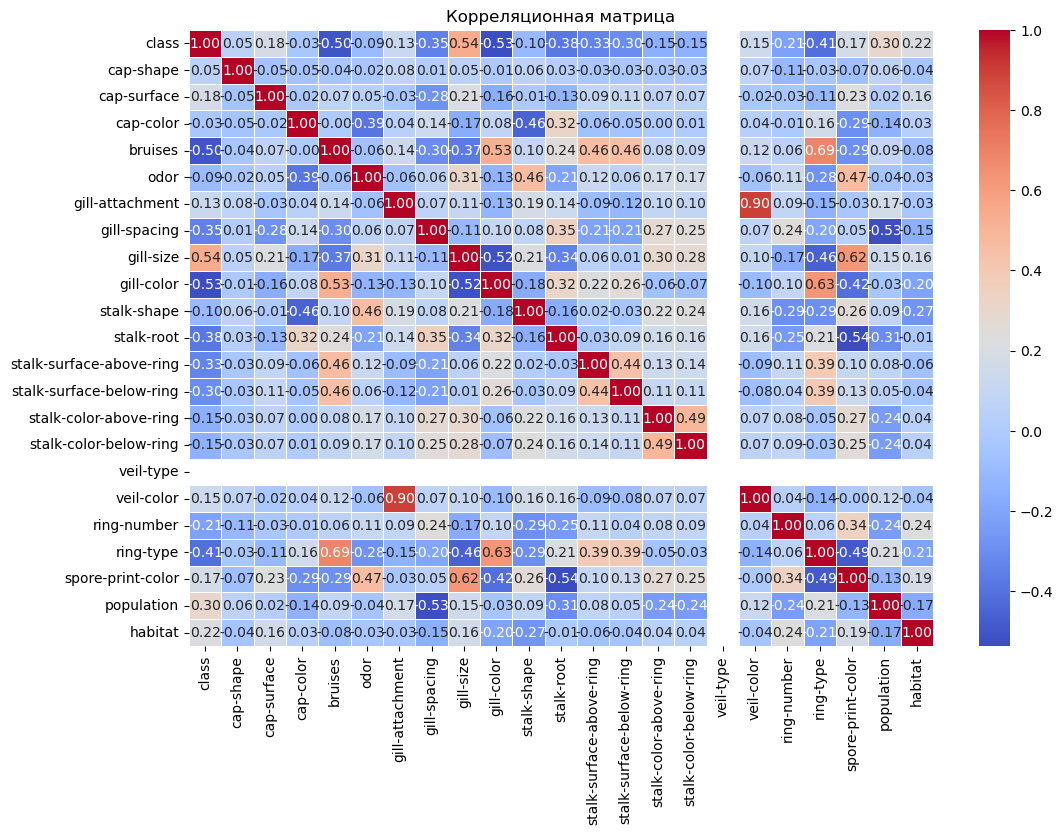

In [220]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Корреляционная матрица')
plt.show()


In [221]:
target_correlations = df.corrwith(df['class'])
target_correlations = target_correlations.abs().sort_values(ascending=False)
print(target_correlations)

class                       1.000000
gill-size                   0.540024
gill-color                  0.530566
bruises                     0.501530
ring-type                   0.411771
stalk-root                  0.379361
gill-spacing                0.348387
stalk-surface-above-ring    0.334593
stalk-surface-below-ring    0.298801
population                  0.298686
habitat                     0.217179
ring-number                 0.214366
cap-surface                 0.178446
spore-print-color           0.171961
stalk-color-above-ring      0.154003
stalk-color-below-ring      0.146730
veil-color                  0.145142
gill-attachment             0.129200
stalk-shape                 0.102019
odor                        0.093552
cap-shape                   0.052951
cap-color                   0.031384
veil-type                        NaN
dtype: float64


In [225]:
from scipy.stats import chi2_contingency
from math import sqrt

# Создадим таблицу сопряженности 
contingency_table = pd.crosstab(df['gill-size'], df['class'])

# Выполним хи-квадрат тест для определения статистической значимости связи
chi2, p, _, _ = chi2_contingency(contingency_table)

# Вычислим коэффициент Крамера
n = contingency_table.sum().sum()
phi_cramer = sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"P-значение: {p}")
print(f"Коэффициент Крамера: {phi_cramer}")
# https://rstudio-pubs-static.s3.amazonaws.com/558925_38b86f0530c9480fad4d029a4e4aea68.html#cramers-v

P-значение: 0.0
Коэффициент Крамера: 0.5397578483204122


## Полезные ссылки

1. [Хорошая статья на русском о PCA](https://habr.com/ru/post/304214/)
2. [sklearn PCA doc](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
3. [Выбор количества компонент](https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/)
4. [PCA через сингулярное разложение](https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8)